In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [44]:

# Use comma as separator, not semicolon
df = pd.read_csv('daily_forex_rates.csv', sep=',', engine='python')

# Check columns again
print(df.columns.tolist())


['currency', 'base_currency', 'currency_name', 'exchange_rate', 'date']


In [45]:
df.columns = df.columns.str.strip().str.lower()
df['date'] = pd.to_datetime(df['date'], errors='coerce')

pair_data = df[(df['currency'] == 'EUR') & (df['base_currency'] == 'USD')].copy()
pair_data = pair_data.sort_values('date')
pair_data.reset_index(drop=True, inplace=True)

print(pair_data.head())


Empty DataFrame
Columns: [currency, base_currency, currency_name, exchange_rate, date]
Index: []


In [46]:
print("Unique currency values:", df['currency'].unique())
print("Unique base_currency values:", df['base_currency'].unique())

Unique currency values: ['ZWL' 'GHS' 'HRK' 'HNL' 'HKD' 'GYD' 'GTQ' 'GNF' 'GMD' 'GIP' 'GGP' 'DOP'
 'GEL' 'GBP' 'FKP' 'FJD' 'EUR' 'ETB' 'ERN' 'EGP' 'HTG' 'HUF' 'IDR' 'ILS'
 'KYD' 'KWD' 'KRW' 'KPW' 'KMF' 'KHR' 'KGS' 'KES' 'JPY' 'JOD' 'JMD' 'JEP'
 'ISK' 'IRR' 'IQD' 'INR' 'IMP' 'DZD' 'DKK' 'LAK' 'BAM' 'BOB' 'BND' 'BMD'
 'BIF' 'BHD' 'BGN' 'BDT' 'BBD' 'AZN' 'DJF' 'AWG' 'AUD' 'ARS' 'AOA' 'ANG'
 'AMD' 'ALL' 'AFN' 'BRL' 'BSD' 'BTC' 'BTN' 'CZK' 'CVE' 'CUP' 'CUC' 'CRC'
 'COP' 'CNH' 'CNY' 'CLP' 'CLF' 'CHF' 'CDF' 'CAD' 'BZD' 'BYR' 'BYN' 'BWP'
 'KZT' 'LBP' 'SCR' 'SZL' 'TWD' 'TTD' 'TRY' 'TOP' 'TND' 'TMT' 'TJS' 'THB'
 'SYP' 'SDG' 'SVC' 'STD' 'SRD' 'SOS' 'SLL' 'SLE' 'SHP' 'SGD' 'TZS' 'UAH'
 'UGX' 'USD' 'ZMW' 'ZMK' 'ZAR' 'YER' 'XPF' 'XOF' 'XDR' 'XCD' 'XAU' 'XAG'
 'XAF' 'WST' 'VUV' 'VND' 'VES' 'UZS' 'UYU' 'SEK' 'AED' 'LKR' 'MMK' 'MYR'
 'MXN' 'MWK' 'MVR' 'MUR' 'MRU' 'MOP' 'MNT' 'MKD' 'SBD' 'MGA' 'MDL' 'MAD'
 'LYD' 'LVL' 'LTL' 'LSL' 'LRD' 'MZN' 'NAD' 'NGN' 'NIO' 'SAR' 'RWF' 'RUB'
 'RSD' 'RON' 'QAR' 'PYG' 'P

In [47]:
pair_data = df[(df['currency'] == 'USD') & (df['base_currency'] == 'EUR')].copy()
pair_data = pair_data.sort_values('date')
pair_data.reset_index(drop=True, inplace=True)
print(pair_data.head())


  currency base_currency         currency_name  exchange_rate       date
0      USD           EUR  United States Dollar         1.2295 2004-09-27
1      USD           EUR  United States Dollar         1.2323 2004-09-28
2      USD           EUR  United States Dollar         1.2331 2004-09-29
3      USD           EUR  United States Dollar         1.2431 2004-09-30
4      USD           EUR  United States Dollar         1.2407 2004-10-01


In [48]:
# Extract only needed columns
data = pair_data[['date', 'exchange_rate']].copy()

# Drop any missing values if present
data = data.dropna()

# Convert 'date' to ordinal number for regression
data['date_ordinal'] = data['date'].map(pd.Timestamp.toordinal)

print(data.head())


        date  exchange_rate  date_ordinal
0 2004-09-27         1.2295        731851
1 2004-09-28         1.2323        731852
2 2004-09-29         1.2331        731853
3 2004-09-30         1.2431        731854
4 2004-10-01         1.2407        731855


In [49]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare features (X) and target (y)
X = data['date_ordinal'].values.reshape(-1, 1)  # Features must be 2D array
y = data['exchange_rate'].values

# Initialize and train model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [50]:
import pandas as pd

# Convert future date to ordinal
future_date = pd.Timestamp('2004-10-02').toordinal()

# Predict exchange rate
predicted_rate = model.predict(np.array([[future_date]]))
print(f"Predicted exchange rate on 2004-10-02: {predicted_rate[0]}")

Predicted exchange rate on 2004-10-02: 1.39484097344328


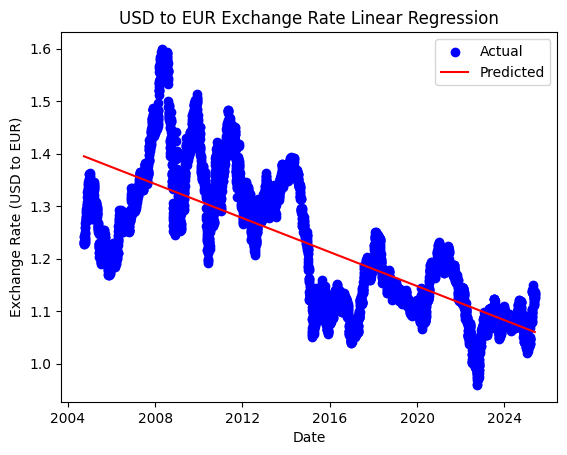

In [51]:
import matplotlib.pyplot as plt

# Plot actual data points
plt.scatter(data['date'], data['exchange_rate'], color='blue', label='Actual')

# Predict for all data points to plot regression line
y_pred = model.predict(X)

# Plot regression line
plt.plot(data['date'], y_pred, color='red', label='Predicted')

plt.xlabel('Date')
plt.ylabel('Exchange Rate (USD to EUR)')
plt.title('USD to EUR Exchange Rate Linear Regression')
plt.legend()
plt.show()


In [52]:
def predict_exchange_rate(date_str):
    """Predict USD to EUR exchange rate for a given date string 'YYYY-MM-DD'."""
    date_ordinal = pd.Timestamp(date_str).toordinal()
    predicted_rate = model.predict([[date_ordinal]])
    return predicted_rate[0]

# Example usage:
date_input = '2004-10-02'
print(f"Predicted USD to EUR rate on {date_input}: {predict_exchange_rate(date_input):.4f}")


Predicted USD to EUR rate on 2004-10-02: 1.3948
